In [1]:
import numpy as np

X_train = np.load('train_data.npy')
y_train = np.load('train_labels.npy')
#X_test = np.load("test_data.npy")
y_test = np.load('test_labels.npy')
#X_val = np.load('val_data.npy')
y_val = np.load('val_labels.npy')

In [2]:
samples = []
for k in range(0,43):
    for i, img in enumerate(X_train):
        if int(np.argmax(y_train[i])) == k:
            samples.append(img)
            break

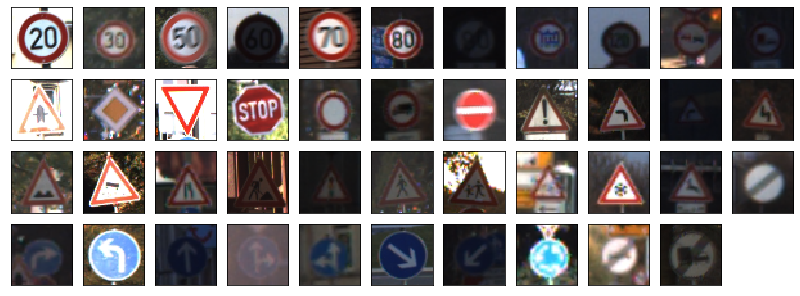

In [4]:
import matplotlib.pyplot as plt



fig, axs = plt.subplots(nrows=4, ncols=11, figsize=(11, 4), constrained_layout=True)

axs = axs.ravel()

for i in range(0,43):
    axs[i].imshow(samples[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])

axs[43].remove()
#fig.tight_layout()
plt.savefig('Samples.png')
plt.show()

In [5]:
# train + val distribution
train_distribution = np.zeros((43,))

for label in np.concatenate((y_train,y_val)):
    train_distribution[int(np.argmax(label))] += 1


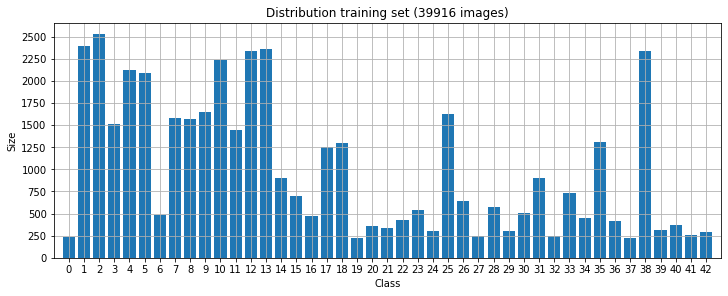

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.8  # the width of the bars
axs.grid(True)
axs.bar(np.arange(0,43),np.round(train_distribution), width)

axs.set_xticks(np.arange(0,43))#, rotation='vertical')
axs.set_xlim(xmax=43,xmin=-1)
axs.set_yticks(np.arange(0,2750,250))
axs.set_title('Distribution training set ('+str(y_train.shape[0])+' images)')
axs.set_xlabel('Class')
axs.set_ylabel('Size')

plt.savefig('Train_distribution.png')

In [8]:
# test distribution
test_distribution = np.zeros((43,))

for label in y_test:
    test_distribution[int(np.argmax(label))] += 1


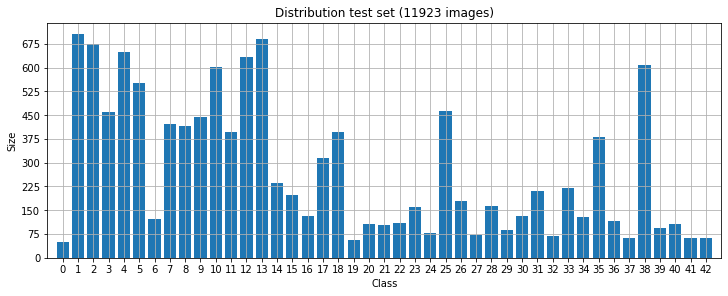

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.8  # the width of the bars
axs.grid(True)
axs.bar(np.arange(0,43),np.round(test_distribution), width)

axs.set_xticks(np.arange(0,43))#, rotation='vertical')
axs.set_xlim(xmax=43,xmin=-1)
axs.set_yticks(np.arange(0,750,75))
axs.set_title('Distribution test set ('+str(y_test.shape[0])+' images)')
axs.set_xlabel('Class')
axs.set_ylabel('Size')

plt.savefig('Test_distribution.png')

0.004193575442422209
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07]


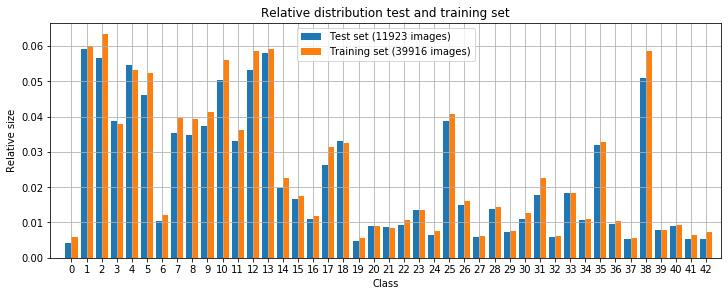

In [12]:
import matplotlib.pyplot as plt



print(test_distribution[0]/y_test.shape[0])

print(np.arange(0,0.07,0.01))
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.4  # the width of the bars
axs.grid(True)
axs.bar(np.arange(0,43)-0.2,np.round(test_distribution/y_test.shape[0],4), width, label='Test set ('+str(y_test.shape[0])+' images)')
axs.bar(np.arange(0,43)+0.2,np.round(train_distribution/y_train.shape[0],4), width, label='Training set ('+str(y_train.shape[0])+' images)')
axs.set_xticks(np.arange(0,43))#, rotation='vertical')
axs.set_xlim(xmax=43,xmin=-1.4)
#axs.set_yticks(np.arange(0,0.07,0.01))
axs.set_title('Relative distribution test and training set')
axs.set_xlabel('Class')
axs.set_ylabel('Relative size')
axs.legend()
plt.savefig('Relative_distribution.png')